In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'last4.csv'
data = pd.read_csv(file_path)



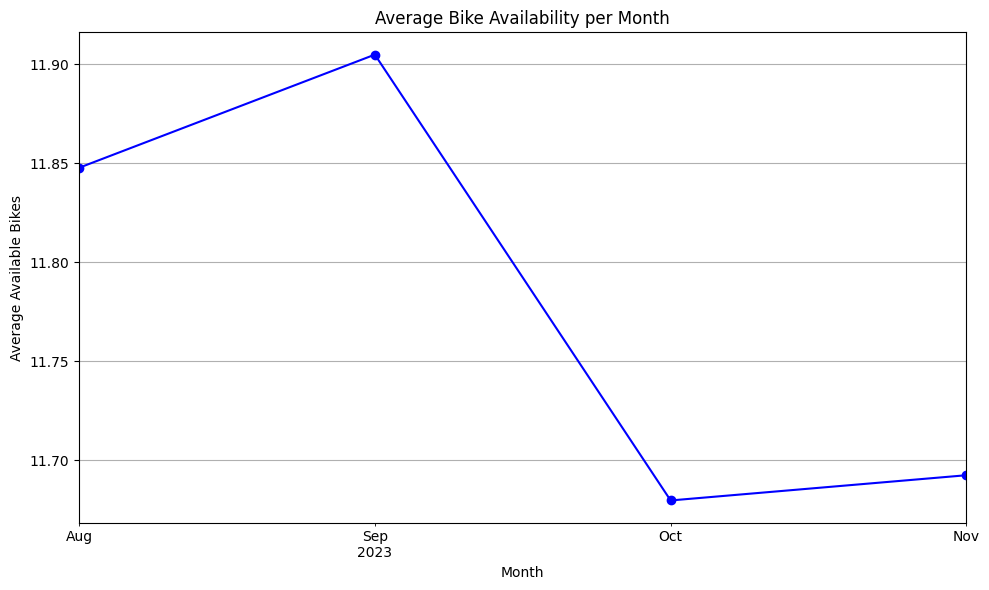

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('last4.csv')  


data['TIME'] = pd.to_datetime(data['TIME'])


data['Month'] = data['TIME'].dt.to_period('M')


monthly_avg = data.groupby('Month')['AVAILABLE_BIKES'].mean()

# Plot
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o', color='blue')
plt.title('Average Bike Availability per Month')
plt.xlabel('Month')
plt.ylabel('Average Available Bikes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.savefig('static/figures/4.png', bbox_inches='tight')
plt.show()



In [4]:



station_availability = data.groupby(['STATION ID', 'NAME'])['AVAILABLE_BIKES'].mean().reset_index()


sorted_stations = station_availability.sort_values('AVAILABLE_BIKES', ascending=False)


top_high_availability_stations = sorted_stations.head(5)


bottom_low_availability_stations = sorted_stations.tail(5)

print("Stations with consistently high availability:")
print(top_high_availability_stations)

print("\nStations with consistently low availability:")
print(bottom_low_availability_stations)


Stations with consistently high availability:
    STATION ID                        NAME  AVAILABLE_BIKES
88          92      HEUSTON BRIDGE (NORTH)        28.170898
89          93   HEUSTON STATION (CENTRAL)        25.696551
37          38               TALBOT STREET        24.487655
90          94  HEUSTON STATION (CAR PARK)        23.412537
82          86             PARKGATE STREET        23.289441

Stations with consistently low availability:
     STATION ID                  NAME  AVAILABLE_BIKES
59           61       HARDWICKE PLACE         3.519524
14           15      HARDWICKE STREET         3.115742
76           79    ECCLES STREET EAST         2.961478
29           30  PARNELL SQUARE NORTH         2.379443
112         116            BROADSTONE         2.148836


/var/folders/r7/v5wfm7cs5qsdv2pzzvrv9vzw0000gn/T/ipykernel_6195/2471242703.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_corr = data[['Day_of_Week', 'AVAILABLE_BIKES']].groupby('Day_of_Week').mean().reset_index()
/var/folders/r7/v5wfm7cs5qsdv2pzzvrv9vzw0000gn/T/ipykernel_6195/2471242703.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day_of_Week', y='AVAILABLE_BIKES', data=day_of_week_corr, palette='viridis')


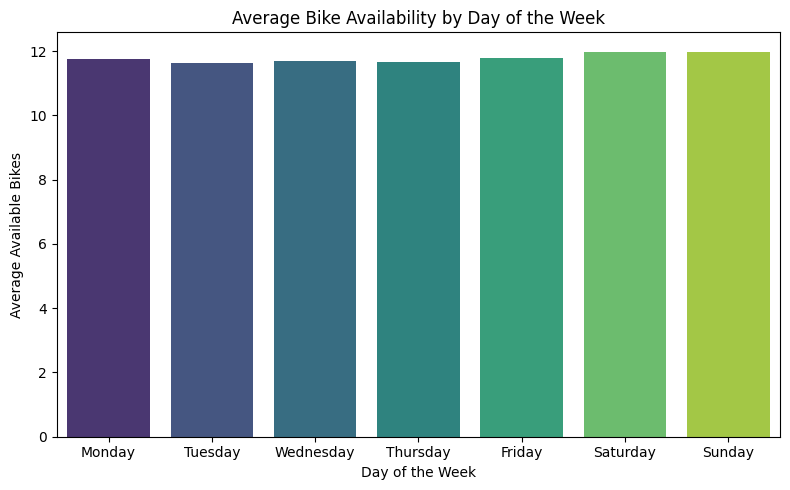

In [9]:



data['TIME'] = pd.to_datetime(data['TIME'])

data['Day_of_Week'] = data['TIME'].dt.day_name()


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day_of_Week'] = pd.Categorical(data['Day_of_Week'], categories=days_order, ordered=True)
day_of_week_corr = data[['Day_of_Week', 'AVAILABLE_BIKES']].groupby('Day_of_Week').mean().reset_index()


plt.figure(figsize=(8, 5))


sns.barplot(x='Day_of_Week', y='AVAILABLE_BIKES', data=day_of_week_corr, palette='viridis')
plt.title('Average Bike Availability by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Available Bikes')

plt.tight_layout()
#plt.show()
plt.savefig('static/figures/5.png', bbox_inches='tight')